In [1]:
import camelot
import pandas as pd

In [2]:
file = './Analisis Anual 2018 ETAS.pdf'

In [3]:
table = camelot.read_pdf(file, pages='3')

In [4]:
table[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta...,12777 \n64916 \n16229 \n25517 \n22257,10747.00 \n5531.76 \n8131.17 \n5995.79 \n5698.26,15484 \n83219 \n14009 \n28873 \n25857,12559.72 \n6937.18 \n6775.49 \n6629.64 \n6485.10
3,Zacapa \nHuehuetenango \nPetén Sur Occidental ...,13467 \n85754 \n14539 \n10657 \n15657 \n22885 ...,5499.70 \n6443.15 \n4960.76 \n4312.31 \n4504.7...,16111 \n87211 \n18107 \n14694 \n19647 \n32402 ...,6464.70 \n6409.30 \n5980.51 \n5787.55 \n5533.6...
4,Total País,662901,3914.98,756338,4369.10


In [5]:

table[0].df[0][2]

'Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta Rosa'

In [6]:
area=table[0].df[0][2].split(' \n')

In [7]:
area.extend(table[0].df[0][3].split(' \n'))

In [8]:
casos2017 = [int(i.strip()) for i in table[0].df[1][2].split('\n')]
casos2017.extend([int(i.strip()) for i in table[0].df[1][3].split('\n')])

casos2018 = [int(i.strip()) for i in table[0].df[3][2].split('\n')]
casos2018.extend([int(i.strip()) for i in table[0].df[3][3].split('\n')])


In [9]:
tasas2017 = [float(i.strip()) for i in table[0].df[2][2].split('\n')]
tasas2017.extend([float(i.strip()) for i in table[0].df[2][3].split('\n')])

tasas2018 = [float(i.strip()) for i in table[0].df[4][2].split('\n')]
tasas2018.extend([float(i.strip()) for i in table[0].df[4][3].split('\n')])

In [10]:
etas = pd.DataFrame(area,columns=['Area de Salud'])
etas['casos 2017'] = casos2017
etas['tasa 2017'] = tasas2017
etas['casos 2018'] = casos2018
etas['tasa 2018'] = tasas2018
etas



,Area de Salud,casos 2017,tasa 2017,casos 2018,tasa 2018
0,Ixcán,12777,10747.00,15484,12559.72
1,San Marcos,64916,5531.76,83219,6937.18
2,Ixil,16229,8131.17,14009,6775.49
3,Chiquimula,25517,5995.79,28873,6629.64
4,Santa Rosa,22257,5698.26,25857,6485.10
5,Zacapa,13467,5499.70,16111,6464.70
6,Huehuetenango,85754,6443.15,87211,6409.30
7,Petén Sur Occidental,14539,4960.76,18107,5980.51
8,Petén Sur Oriental,10657,4312.31,14694,5787.55
9,Retalhuleu,15657,4504.74,19647,5533.66


In [11]:
etas.describe()

,casos 2017,tasa 2017,casos 2018,tasa 2018
count,29.000000,29.000000,29.000000,29.000000
mean,22858.655172,4319.882414,26080.620690,4782.187931
std,17573.564154,2037.263456,20209.094508,2284.237179
min,7520.000000,1411.860000,8345.000000,1416.070000
25%,12777.000000,3293.580000,14370.000000,3233.510000
50%,16229.000000,4298.090000,18107.000000,5165.630000
75%,22885.000000,5499.700000,28873.000000,5980.510000
max,85754.000000,10747.000000,87211.000000,12559.720000


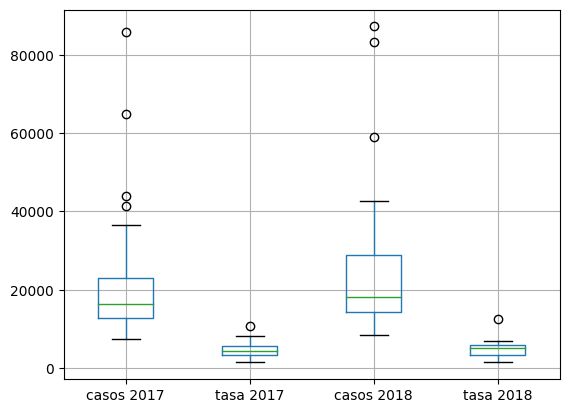

In [12]:
etas.boxplot();

In [13]:
%matplotlib inline

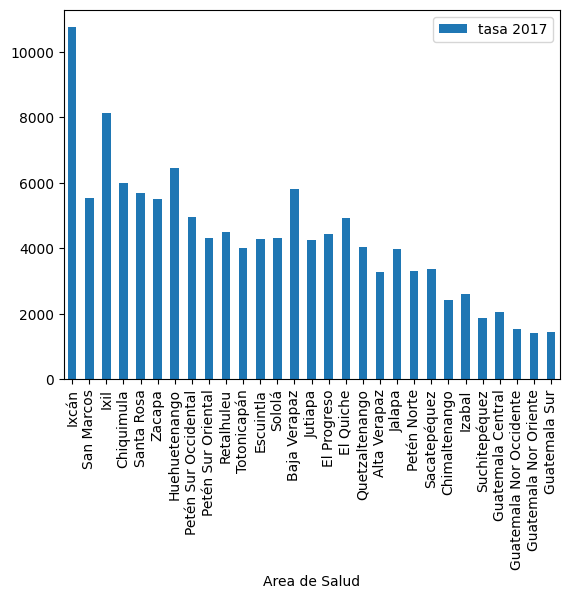

In [14]:
etas.plot(x='Area de Salud',y='tasa 2017',kind='bar');

## WEBSCRAPING

In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
url = 'https://es.wikipedia.org/wiki/Organizaci%C3%B3n_territorial_de_Guatemala'

In [17]:
response = requests.get(url=url)

In [18]:
print('Status Code : [',response.status_code,'] from ',url)

Status Code : [ 200 ] from  https://es.wikipedia.org/wiki/Organizaci%C3%B3n_territorial_de_Guatemala


In [19]:
soup = BeautifulSoup(response.text,'html.parser')

In [20]:
import lxml

In [21]:
departamento = soup.find('table',{'class':'wikitable'})

In [22]:
dfDepartament = pd.read_html(str(departamento))

In [23]:
dfDepartament = pd.DataFrame(dfDepartament[0])

In [24]:
dfDepartament

,Departamento,Cabecera,Superficie (km²),Población (hab.)[1]​
0,Alta Verapaz,Cobán,8 686,1 112 781
1,Baja Verapaz,Salamá,3 124,270 521
2,Chimaltenango,Chimaltenango,1 979,666 938
3,Chiquimula,Chiquimula,2 376,370 891
4,El Progreso,Guastatoya,1 922,158 092
5,Escuintla,Escuintla,4 384,701 016
6,Guatemala,Ciudad de Guatemala,2 126,2 541 581
7,Huehuetenango,Huehuetenango,7 400,1 143 887
8,Izabal,Puerto Barrios,9 038,413 399
9,Jalapa,Jalapa,2 063,318 420


In [25]:
region = soup.findAll('table')[1]
dfRegion = pd.read_html(str(region))[0]
dfRegion

,Región,Departamentos que la conforman,Población,Ciudad Más Poblada
0,Suroccidente (Región VI),Quetzaltenango Retalhuleu San Marcos Sololá...,4398222,Quetzaltenango
1,Metropolitana (Región I),Guatemala,3573179,Ciudad de Guatemala
2,Noroccidente (Región VII),Huehuetenango Quiché,2686692,Huehuetenango
3,Central (Región V),Chimaltenango Escuintla Sacatepéquez,1991006,Escuintla
4,Verapaz (Región II),Alta Verapaz Baja Verapaz,1790153,Cobán
5,Nororiente (Región III),Chiquimula El Progreso Izabal Zacapa,1410262,Puerto Barrios
6,Suroriente (Región IV),Jalapa Jutiapa Santa Rosa,1347255,Jalapa
7,Petén (Región VIII),Petén,858256,Santa Elena de la Cruz


In [26]:
segplan = soup.findAll('table')[2]
dfSegplan = pd.read_html(str(segplan))[0]
dfSegplan

,Región,Departamento(s),Municipios
0,Petén,Petén,Todos los municipios
1,Franja Transversal del Norte,Huehuetenango,"Jacaltenango, Santa Ana Huista, San Antonio Hu..."
2,Franja Transversal del Norte,Izabal,"Puerto Barrios, Morales, Los Amates, El Estor ..."
3,Franja Transversal del Norte,Alta Verapaz,"Cobán, San Pedro Carchá, Senahú, Lanquín, Caha..."
4,Franja Transversal del Norte,Quiché,"Ixcán, Uspantán y Chajul."
5,Región Oriente,Zacapa,Todos los municipios
6,Región Oriente,El Progreso,Todos los municipios
7,Región Oriente,Chiquimula,Todos los municipios
8,Región Oriente,Izabal,"Puerto Barrios, Morales y Los Amates."
9,Región Oriente,Jutiapa,"Agua Blanca, Santa Catarina Mita, Asunción Mit..."


In [27]:
dfSegplan = dfSegplan.set_index('Región',append=True).swaplevel(0,1)
dfSegplan

Departamento(s)  \
Región                                            
Petén                        0            Petén   
Franja Transversal del Norte 1    Huehuetenango   
                             2           Izabal   
                             3     Alta Verapaz   
                             4           Quiché   
Región Oriente               5           Zacapa   
                             6      El Progreso   
                             7       Chiquimula   
                             8           Izabal   
                             9          Jutiapa   
                             10          Jalapa   
                             11      Santa Rosa   
Litoral del Pacífico         12         Jutiapa   
                             13      Santa Rosa   
                             14       Escuintla   
                             15   Suchitepéquez   
                             16      Retalhuleu   
                             17      San Marcos   
                             18  Quetzaltenango   

                                                                        Municipios  
Región                                                                              
Petén                        0                                Todos los municipios  
Franja Transversal del Norte 1   Jacaltenango, Santa Ana Huista, San Antonio Hu...  
                             2   Puerto Barrios, Morales, Los Amates, El Estor ...  
                             3   Cobán, San Pedro Carchá, Senahú, Lanquín, Caha...  
                             4                           Ixcán, Uspantán y Chajul.  
Región Oriente               5                                Todos los municipios  
                             6                                Todos los municipios  
                             7                                Todos los municipios  
                             8               Puerto Barrios, Morales y Los Amates.  
                             9   Agua Blanca, Santa Catarina Mita, Asunción Mit...  
                             10                               Todos los municipios  
                             11  Santa Rosa de Lima, Nueva Santa Rosa, San Rafa...  
Litoral del Pacífico         12                                   Moyuta y Pasaco.  
                             13               Chiquimulilla, Guazacapán y Taxisco.  
                             14  Iztapa, San José, La Gomera, Nueva Concepción,...  
                             15  Cuyotenango, Santo Domingo Suchitepéquez, San ...  
                             16                               Todos los municipios  
                             17      Ocós, Ayutla, Pajapita, Catarina y Malacatán.  
                             18   Coatepeque, Génova, Colomba y Flores Costa Cuca.

In [28]:
dfSegplan.index.names = ['Región','Indíce']
dfSegplan

Departamento(s)  \
Región                       Indíce                   
Petén                        0                Petén   
Franja Transversal del Norte 1        Huehuetenango   
                             2               Izabal   
                             3         Alta Verapaz   
                             4               Quiché   
Región Oriente               5               Zacapa   
                             6          El Progreso   
                             7           Chiquimula   
                             8               Izabal   
                             9              Jutiapa   
                             10              Jalapa   
                             11          Santa Rosa   
Litoral del Pacífico         12             Jutiapa   
                             13          Santa Rosa   
                             14           Escuintla   
                             15       Suchitepéquez   
                             16          Retalhuleu   
                             17          San Marcos   
                             18      Quetzaltenango   

                                                                            Municipios  
Región                       Indíce                                                     
Petén                        0                                    Todos los municipios  
Franja Transversal del Norte 1       Jacaltenango, Santa Ana Huista, San Antonio Hu...  
                             2       Puerto Barrios, Morales, Los Amates, El Estor ...  
                             3       Cobán, San Pedro Carchá, Senahú, Lanquín, Caha...  
                             4                               Ixcán, Uspantán y Chajul.  
Región Oriente               5                                    Todos los municipios  
                             6                                    Todos los municipios  
                             7                                    Todos los municipios  
                             8                   Puerto Barrios, Morales y Los Amates.  
                             9       Agua Blanca, Santa Catarina Mita, Asunción Mit...  
                             10                                   Todos los municipios  
                             11      Santa Rosa de Lima, Nueva Santa Rosa, San Rafa...  
Litoral del Pacífico         12                                       Moyuta y Pasaco.  
                             13                   Chiquimulilla, Guazacapán y Taxisco.  
                             14      Iztapa, San José, La Gomera, Nueva Concepción,...  
                             15      Cuyotenango, Santo Domingo Suchitepéquez, San ...  
                             16                                   Todos los municipios  
                             17          Ocós, Ayutla, Pajapita, Catarina y Malacatán.  
                             18       Coatepeque, Génova, Colomba y Flores Costa Cuca.

In [29]:
dfRegion.describe()

,Población
count,8.000000e+00
mean,2.256878e+06
std,1.212529e+06
min,8.582560e+05
25%,1.394510e+06
50%,1.890580e+06
75%,2.908314e+06
max,4.398222e+06


In [30]:
dfDepartament.describe()

,Departamento,Cabecera,Superficie (km²),Población (hab.)[1]​
count,22,22,22,22
unique,22,22,21,22
top,Alta Verapaz,Cobán,1 061,1 112 781
freq,1,1,2,1


In [31]:
resumen = dfRegion.describe()

In [32]:
resumen.count()

Población    8
dtype: int64

In [33]:
print('Poblacion: {:0.2f}'.format(resumen.mean()[0]))

Poblacion: 1864912.03


In [34]:
pd.options.display.float_format = '{:,.2f}'.format

In [35]:
resumen

,Población
count,8.00
mean,"2,256,878.12"
std,"1,212,528.58"
min,"858,256.00"
25%,"1,394,510.25"
50%,"1,890,579.50"
75%,"2,908,313.75"
max,"4,398,222.00"


In [36]:
dfDepartament['Población (hab.)[1]\u200b'] = list(int(x.replace('\xa0','')) for x in dfDepartament['Población (hab.)[1]\u200b'])
dfDepartament['Superficie (km²)'] = list(int(x.replace('\xa0','')) for x in dfDepartament['Superficie (km²)'])

In [38]:
dfDepartament

,Departamento,Cabecera,Superficie (km²),Población (hab.)[1]​
0,Alta Verapaz,Cobán,8686,1112781
1,Baja Verapaz,Salamá,3124,270521
2,Chimaltenango,Chimaltenango,1979,666938
3,Chiquimula,Chiquimula,2376,370891
4,El Progreso,Guastatoya,1922,158092
5,Escuintla,Escuintla,4384,701016
6,Guatemala,Ciudad de Guatemala,2126,2541581
7,Huehuetenango,Huehuetenango,7400,1143887
8,Izabal,Puerto Barrios,9038,413399
9,Jalapa,Jalapa,2063,318420


In [39]:
dfDepartament.describe()

,Superficie (km²),Población (hab.)[1]​
count,22.00,22.00
mean,"4,949.45","640,200.27"
std,"7,356.16","516,886.69"
min,465.00,"158,092.00"
25%,"1,959.50","325,462.50"
50%,"2,600.00","456,757.00"
75%,"4,235.75","767,272.50"
max,"35,854.00","2,541,581.00"


In [40]:
dfDepartament.to_excel('departamento.xlsx')